In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection, linear_model, ensemble, svm, tree, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier

In [3]:
X = pd.read_csv("X_tweet_nuria.csv")
y_fc = pd.read_csv("y_fc_tweet_nuria.csv", header = None)
y_rt = pd.read_csv("y_rt_tweet_nuria.csv", header = None)

In [4]:
y_fc = np.array(y_fc)
y_rt = np.array(y_rt)
X = np.array(X)

In [5]:
y_fc = np.concatenate(y_fc)
y_rt = np.concatenate(y_rt)
print(y_fc)
print(y_rt)

[18  0  4 ...  6 11  0]
[4 0 2 ... 1 1 0]


In [8]:
cv = model_selection.KFold(n_splits = 10, shuffle=True, random_state=42)
cv.get_n_splits(X)

acc_rt = np.zeros((10,7))
acc_fc = np.zeros((10,2))

# Models que millors resultats donen son els seguents:
nn10 = neighbors.KNeighborsClassifier(n_neighbors=10) #rt
nn12 = neighbors.KNeighborsClassifier(n_neighbors=12) #rt
abc100 = AdaBoostClassifier(n_estimators=100)  #rt i fc

#Afegim tambe:
nn9 = neighbors.KNeighborsClassifier(n_neighbors=9) #rt
nn11 = neighbors.KNeighborsClassifier(n_neighbors=11) #rt
nn13 = neighbors.KNeighborsClassifier(n_neighbors=13) #rt
abc50 = AdaBoostClassifier()  #rt i fc

[[0.5034965  0.5034965 ]
 [0.46386946 0.46386946]
 [0.45454545 0.45454545]
 [0.5011655  0.5011655 ]
 [0.46853147 0.47086247]
 [0.45687646 0.45454545]
 [0.48717949 0.48951049]
 [0.5011655  0.5011655 ]
 [0.46153846 0.46153846]
 [0.49299065 0.49299065]]


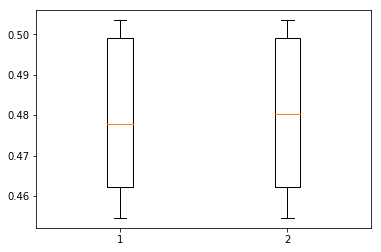

In [9]:
i = 0
for train_idx, test_idx in cv.split(X):
    X_train,y_train = X[train_idx,:],y_fc[train_idx]
    X_test,y_test = X[test_idx,:],y_fc[test_idx]
    
    scaler = StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #abc50
    abc50.fit(X_train_scaled,y_train)
    yhat_abc50 = abc50.predict(X_test_scaled).reshape(-1,1)
    acc_fc[i,0] = metrics.accuracy_score(y_test,yhat_abc50)
    
    #abc100
    abc100.fit(X_train_scaled,y_train)
    yhat_abc100 = abc100.predict(X_test_scaled).reshape(-1,1)
    acc_fc[i,1] = metrics.accuracy_score(y_test,yhat_abc100)


    i = i+1
    
fig = plt.figure()
plt.boxplot(acc_fc)
print(acc_fc)

[[0.78787879 0.78787879 0.78787879 0.78787879 0.78787879 0.78787879
  0.78321678]
 [0.78554779 0.78321678 0.78321678 0.78321678 0.78321678 0.78321678
  0.78321678]
 [0.79254079 0.79254079 0.79254079 0.79254079 0.79254079 0.79254079
  0.79254079]
 [0.78088578 0.78088578 0.78088578 0.78088578 0.78088578 0.78088578
  0.78088578]
 [0.76923077 0.76689977 0.76689977 0.76689977 0.76689977 0.76689977
  0.76689977]
 [0.75990676 0.75990676 0.75990676 0.75990676 0.75990676 0.75757576
  0.75990676]
 [0.79254079 0.79254079 0.79254079 0.79254079 0.79254079 0.79487179
  0.79254079]
 [0.7995338  0.7995338  0.7995338  0.7995338  0.7995338  0.7972028
  0.7972028 ]
 [0.79487179 0.79254079 0.79487179 0.79487179 0.79487179 0.79254079
  0.79254079]
 [0.77570093 0.77570093 0.77570093 0.77570093 0.77570093 0.77336449
  0.77336449]]


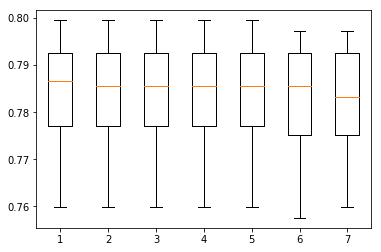

In [11]:
i = 0
for train_idx, test_idx in cv.split(X):
    X_train,y_train = X[train_idx,:],y_rt[train_idx]
    X_test,y_test = X[test_idx,:],y_rt[test_idx]
    
    scaler = StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    
    nn9.fit(X_train_scaled,y_train)
    nn10.fit(X_train_scaled,y_train)
    nn11.fit(X_train_scaled,y_train)
    nn12.fit(X_train_scaled,y_train)
    nn13.fit(X_train_scaled,y_train)
    abc50.fit(X_train_scaled,y_train)
    abc100.fit(X_train_scaled,y_train)
    
    X_test_scaled = scaler.transform(X_test)
    yhat_nn9 = nn9.predict(X_test_scaled).reshape(-1,1)
    yhat_nn10 = nn10.predict(X_test_scaled).reshape(-1,1)
    yhat_nn11 = nn11.predict(X_test_scaled).reshape(-1,1)
    yhat_nn12 = nn12.predict(X_test_scaled).reshape(-1,1)
    yhat_nn13 = nn13.predict(X_test_scaled).reshape(-1,1)
    yhat_abc50 = abc50.predict(X_test_scaled).reshape(-1,1)
    yhat_abc100 = abc100.predict(X_test_scaled).reshape(-1,1)
    
    
    acc_rt[i,0] = metrics.accuracy_score(y_test,yhat_nn9)
    acc_rt[i,1] = metrics.accuracy_score(y_test,yhat_nn10)
    acc_rt[i,2] = metrics.accuracy_score(y_test,yhat_nn11)
    acc_rt[i,3] = metrics.accuracy_score(y_test,yhat_nn12)
    acc_rt[i,4] = metrics.accuracy_score(y_test,yhat_nn13)
    acc_rt[i,5] = metrics.accuracy_score(y_test,yhat_abc50)
    acc_rt[i,6] = metrics.accuracy_score(y_test,yhat_abc100)
    
    i = i+1
    
    
fig = plt.figure()
plt.boxplot(acc_rt)
print(acc_rt)